<a href="https://colab.research.google.com/github/srijasriramdas/DAV_assignment-165/blob/main/165_DAV_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# main.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress annoying warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


**PART A**:

Data Loading and Initial Inspection
Loads the dataset Nutrition_Value_Dataset.csv using pandas.

Displays the first and last few rows to get an overview.

Shows the data types of each column.

Checks for missing values in the dataset.

Purpose: To understand the structure and cleanliness of the raw data.

In [2]:

# ========== PART A: Data Loading and Initial Inspection ==========

print("\n=========== PART A: Data Loading & Inspection ===========")

# Load dataset
df = pd.read_csv('Nutrition_Value_Dataset.csv')

# Show first 5 rows
print("\nFirst 5 rows:\n", df.head())

# Show last 3 rows
print("\nLast 3 rows:\n", df.tail(3))

# Show data types
print("\nData Types:\n", df.dtypes)

# Show missing values
print("\nMissing Values:\n", df.isnull().sum())




=========== PART A: Data Loading & Inspection ===========

First 5 rows:
      Company   Category                           Product Per Serve Size  \
0  Pizza Hut  All Meals          Corn n Cheese (Personal)        143.5 g   
1  Pizza Hut  All Meals          Country Feast (Personal)          178 g   
2  Pizza Hut  All Meals          Double Cheese (Personal)          143 g   
3  Pizza Hut  All Meals  Double Paneer Supreme (Personal)        174.5 g   
4  Pizza Hut  All Meals          Farmer`s Pick (Personal)          177 g   

   Energy (kCal)  Carbohydrates (g)  Protein (g)  Fiber (g)  Sugar (g)  \
0         432.60              65.64        17.91       3.85        0.0   
1         407.60              67.11        16.73       7.19        0.0   
2         423.33              59.97        18.26       3.49        0.0   
3         474.03              52.86        20.07       3.79        0.0   
4         408.16              53.93        19.91       2.46        0.0   

   Total Fat (g)  Satur

**PART B:**
Data Cleaning
Removes rows with missing values using dropna().

Displays the shape of the cleaned dataset.

✅ Purpose: To ensure the data is complete and ready for analysis.

In [3]:
# ========== PART B: Data Cleaning ==========

print("\n=========== PART B: Data Cleaning ===========")

# Drop rows with missing values
df_cleaned = df.dropna()
print("\nShape after dropping missing values:", df_cleaned.shape)



=========== PART B: Data Cleaning ===========

Shape after dropping missing values: (443, 14)


**PART C:**
Basic Analysis (NumPy & Pandas)
Calculates:

Mean, median, and standard deviation of calories (Energy (kCal)).

Displays descriptive statistics for the dataset.

Filters and lists items with more than 500 calories.

Sorts and shows top 5 products based on protein content.

✅ Purpose: To perform foundational analysis and identify key nutritional values.

In [4]:

# ========== PART C: Basic Analysis (NumPy & Pandas) ==========

print("\n=========== PART C: Basic Analysis ===========")

# Function to display energy statistics
def energy_stats(df):
    """Prints mean, median, and std deviation of Energy"""
    energy = df['Energy (kCal)']
    print("\nEnergy (kCal) Statistics:")
    print("Mean:", np.mean(energy))
    print("Median:", np.median(energy))
    print("Standard Deviation:", np.std(energy))

energy_stats(df_cleaned)

# Summary statistics
print("\nSummary statistics:\n", df_cleaned.describe(include='all'))

# Filter items with high energy
high_energy = df_cleaned[df_cleaned['Energy (kCal)'] > 500]
print("\nItems with Energy > 500 kCal:\n", high_energy[['Product', 'Energy (kCal)']].head())

# Sort by protein
top_protein = df_cleaned.sort_values(by='Protein (g)', ascending=False)
print("\nTop 5 Items by Protein:\n", top_protein[['Product', 'Protein (g)']].head())



=========== PART C: Basic Analysis ===========

Energy (kCal) Statistics:
Mean: 404.57126185101583
Median: 365.21
Standard Deviation: 359.8816832925384

Summary statistics:
           Company   Category       Product Per Serve Size  Energy (kCal)  \
count         443        443           443            443     443.000000   
unique          5         13           377            309            NaN   
top     Pizza Hut  All Meals  Medium Fries          330.0            NaN   
freq          144        257             3              9            NaN   
mean          NaN        NaN           NaN            NaN     404.571262   
std           NaN        NaN           NaN            NaN     360.288559   
min           NaN        NaN           NaN            NaN       0.000000   
25%           NaN        NaN           NaN            NaN     199.720000   
50%           NaN        NaN           NaN            NaN     365.210000   
75%           NaN        NaN           NaN            NaN     480

**PART D:**
Advanced Operations
Adds a new column Fat+Protein by summing fat and protein values.

Groups data by company to find average calories per company.

Merges external company_info.csv to include details like founding year.

Creates pivot tables for:

Total calories per company.

Average sodium per category.

✅ Purpose: To extract deeper insights using grouping, aggregation, and merging.



In [5]:

# ========== PART D: Advanced Operations ==========

print("\n=========== PART D: Advanced Operations ===========")

# Add new column: Fat + Protein
df_cleaned['Fat+Protein'] = df_cleaned['Total Fat (g)'] + df_cleaned['Protein (g)']
print("\nNew Column 'Fat+Protein':\n", df_cleaned[['Product', 'Fat+Protein']].head())

# Group by company and calculate average energy
avg_energy = df_cleaned.groupby('Company')['Energy (kCal)'].mean()
print("\nAverage Energy (kCal) by Company:\n", avg_energy)

# Load company info for merging
company_info = pd.read_csv('company_info.csv')

# Merge on 'Company'
merged_df = pd.merge(df_cleaned, company_info, on='Company', how='left')
print("\nMerged DataFrame Sample:\n", merged_df[['Product', 'Company', 'Founded_Year']].head())

# Pivot table: Total Energy per company
pivot_energy = df_cleaned.pivot_table(values='Energy (kCal)', index='Company', aggfunc='sum')
print("\nPivot Table - Total Energy (kCal) per Company:\n", pivot_energy)

# Pivot table: Avg Sodium per Category
pivot_sodium = df_cleaned.pivot_table(values='Sodium (mg)', index='Category', aggfunc='mean')
print("\nPivot Table - Average Sodium (mg) per Category:\n", pivot_sodium)

# Group by Category and get average sodium
group_sodium = df_cleaned.groupby('Category')['Sodium (mg)'].mean()
print("\nGroupBy - Average Sodium (mg) per Category:\n", group_sodium)



=========== PART D: Advanced Operations ===========

New Column 'Fat+Protein':
                             Product  Fat+Protein
0          Corn n Cheese (Personal)        28.84
1          Country Feast (Personal)        24.76
2          Double Cheese (Personal)        30.53
3  Double Paneer Supreme (Personal)        40.33
4          Farmer`s Pick (Personal)        32.44

Average Energy (kCal) by Company:
 Company
Burger King    461.300000
KFC            723.611111
McDonalds      243.215714
Pizza Hut      416.816451
Starbucks      307.391304
Name: Energy (kCal), dtype: float64

Merged DataFrame Sample:
                             Product    Company  Founded_Year
0          Corn n Cheese (Personal)  Pizza Hut          1958
1          Country Feast (Personal)  Pizza Hut          1958
2          Double Cheese (Personal)  Pizza Hut          1958
3  Double Paneer Supreme (Personal)  Pizza Hut          1958
4          Farmer`s Pick (Personal)  Pizza Hut          1958

Pivot Table - Total E

<ipython-input-5-088bc20c808e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Fat+Protein'] = df_cleaned['Total Fat (g)'] + df_cleaned['Protein (g)']


**PART E:**
Visualization
Creates 4 visualizations using matplotlib and seaborn:

Bar plot of average calories by company.

Bar plot of average sodium by category.

Scatter plot of protein vs. total fat.

Histogram showing the distribution of calories.

✅ Purpose: To visually understand trends, comparisons, and distributions in the data.


=========== PART E: Visualization ===========


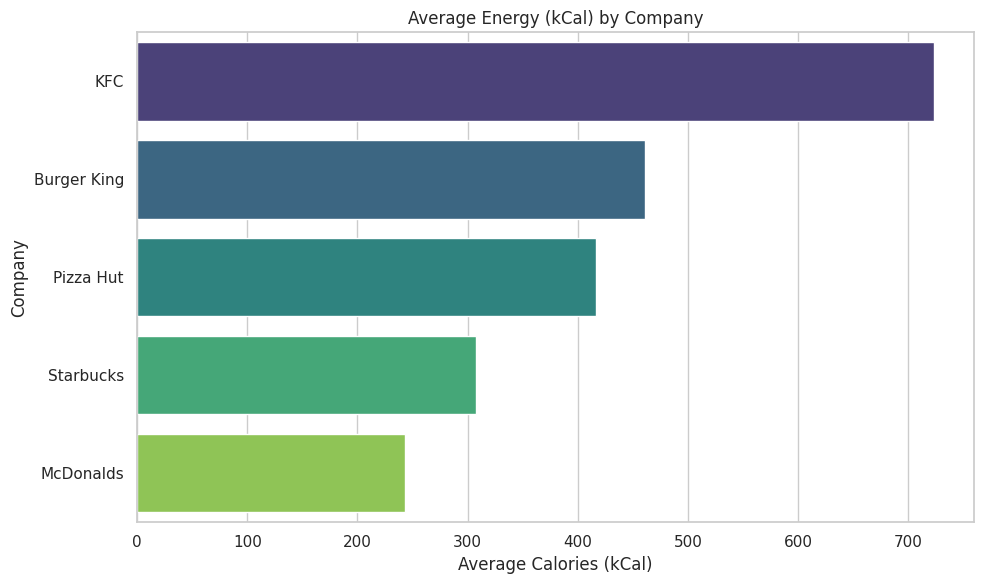

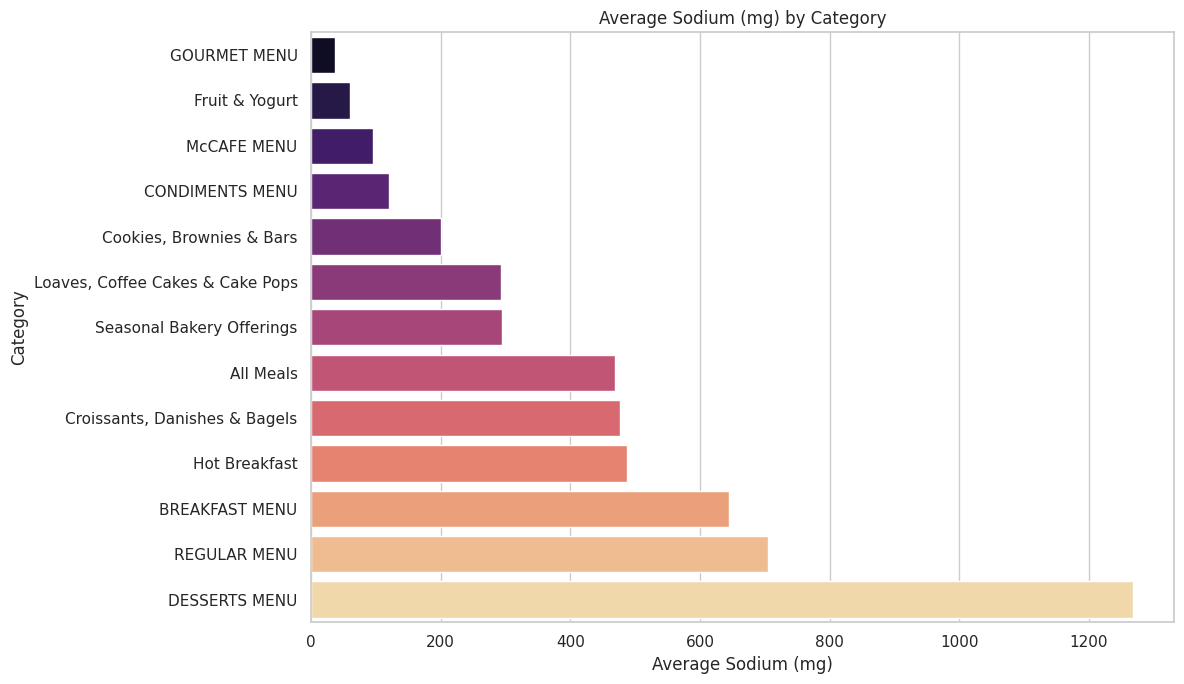

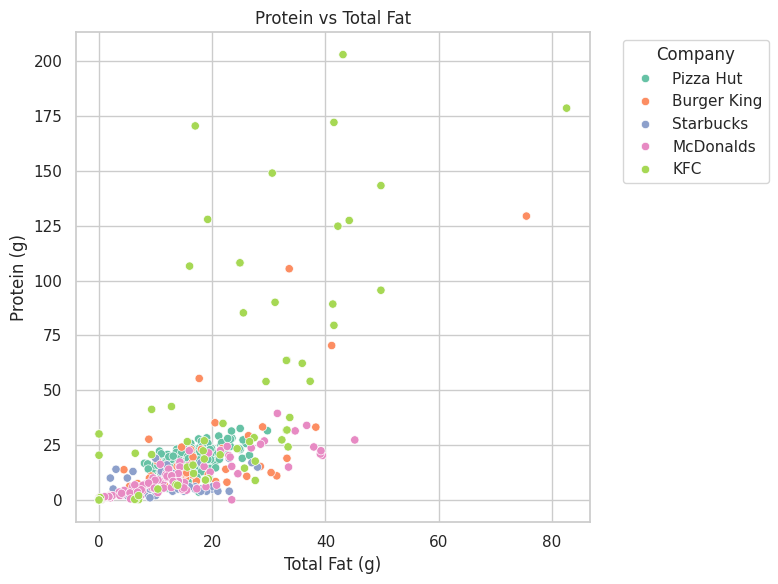

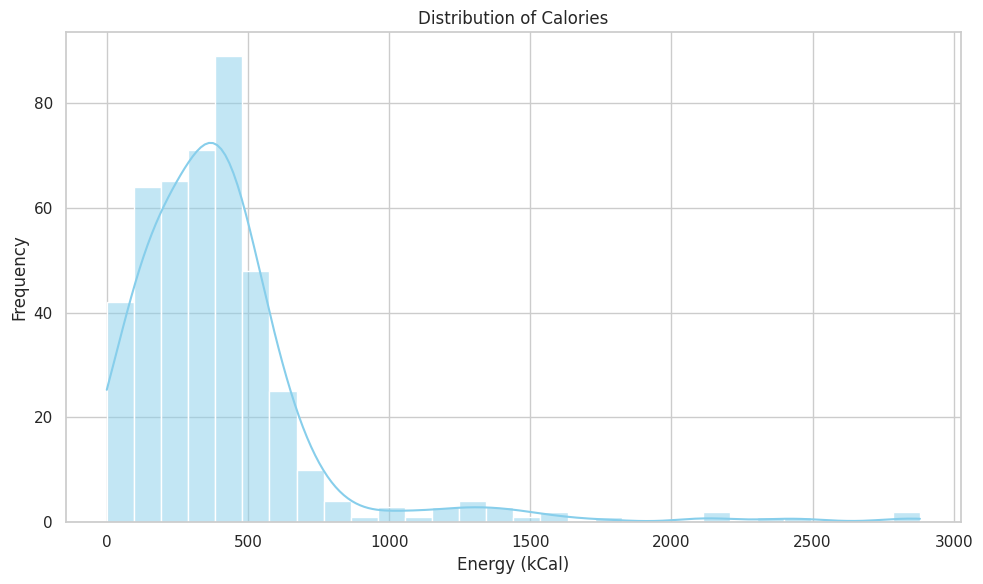


✅ Script execution completed successfully!


In [6]:

# ========== PART E: Visualization ==========

import matplotlib.pyplot as plt
import seaborn as sns

print("\n=========== PART E: Visualization ===========")

# Set style
sns.set(style="whitegrid")

# ---------- 1. Average Energy (kCal) by Company ----------
plt.figure(figsize=(10, 6))
avg_energy = df_cleaned.groupby('Company')['Energy (kCal)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_energy.values, y=avg_energy.index, palette="viridis")
plt.title('Average Energy (kCal) by Company')
plt.xlabel('Average Calories (kCal)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# ---------- 2. Average Sodium (mg) by Category ----------
plt.figure(figsize=(12, 7))
avg_sodium = df_cleaned.groupby('Category')['Sodium (mg)'].mean().sort_values()
sns.barplot(x=avg_sodium.values, y=avg_sodium.index, palette="magma")
plt.title('Average Sodium (mg) by Category')
plt.xlabel('Average Sodium (mg)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# ---------- 3. Scatter Plot: Protein vs. Total Fat ----------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Total Fat (g)', y='Protein (g)', hue='Company', palette='Set2')
plt.title('Protein vs Total Fat')
plt.xlabel('Total Fat (g)')
plt.ylabel('Protein (g)')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---------- 4. Histogram: Distribution of Calories ----------
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Energy (kCal)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Calories')
plt.xlabel('Energy (kCal)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Final message
print("\n✅ Script execution completed successfully!")
